In [1]:
# importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [2]:
# Regex notation by "\s+". This means a single space, or multiple spaces are all to be treated as a single separator.
df_ambos = pd.read_csv('bltper_1x1.txt', skiprows=2, sep = '\s+') 

In [3]:
df_ambos.head()

,Year,Age,mx,qx,ax,lx,dx,Lx,Tx,ex
0,1933,0,0.06129,0.05861,0.25,100000,5861,95624,6089609,60.90
1,1933,1,0.00946,0.00941,0.50,94139,886,93696,5993985,63.67
2,1933,2,0.00435,0.00434,0.50,93253,405,93050,5900289,63.27
3,1933,3,0.00310,0.00310,0.50,92848,288,92704,5807239,62.55
4,1933,4,0.00239,0.00238,0.50,92560,221,92450,5714535,61.74


In [4]:
df_ambos.tail()

,Year,Age,mx,qx,ax,lx,dx,Lx,Tx,ex
9652,2019,106,0.51164,0.40742,0.50,272,111,216,497,1.83
9653,2019,107,0.54239,0.42668,0.50,161,69,127,281,1.75
9654,2019,108,0.57289,0.44533,0.50,92,41,72,154,1.67
9655,2019,109,0.60292,0.46327,0.50,51,24,39,83,1.62
9656,2019,110+,0.63226,1.00000,1.58,27,27,43,43,1.58


Obs.:

#### colunas:
1. Year: Ano da tábua
2. Age: idade da pessoa
3. mx: taxa central de mortalidade na idade x;
4. qx: probabilidade de morte na idade x;
5. ax: anuidade;
6. lx: número de vivos na idade x;
7. dx: número de mortos na idade x;
8. Lx: Pessoas vivas na metade da idade x;
9. Tx: Quantidade de existencia na idade x. Representa o somatório dos anos vividos pelas pessoas componentes de um grupo de idade x até o instante de sua extinção. Em outras palavras, é o acompanhamento, ano a ano, de um grupo até sua extinção;
10. Ex: Expectativa de vida na idade x.


In [5]:
df_ambos.shape

(9657, 10)

In [6]:
# Retirar sinal (+) na idade +110 anos e colocar 110
df_ambos[df_ambos['Age'].astype(str).str.contains("110")].head()

,Year,Age,mx,qx,ax,lx,dx,Lx,Tx,ex
110,1933,110+,0.60086,1.0,1.66,1,1,2,2,1.66
221,1934,110+,0.61355,1.0,1.63,1,1,1,1,1.63
332,1935,110+,0.63231,1.0,1.58,1,1,1,1,1.58
443,1936,110+,0.68602,1.0,1.46,0,0,0,0,1.46
554,1937,110+,0.65468,1.0,1.53,0,0,1,1,1.53


In [7]:
# Tratamento da idade 110+ para os anos.
# DataFrame.loc[condition, column_name] = new_value
df_ambos.loc[(df_ambos.Age == '110+'),'Age'] = 110

In [8]:
# Conferencia
df_ambos[df_ambos['Age'].astype(str).str.contains("110")].head()

,Year,Age,mx,qx,ax,lx,dx,Lx,Tx,ex
110,1933,110,0.60086,1.0,1.66,1,1,2,2,1.66
221,1934,110,0.61355,1.0,1.63,1,1,1,1,1.63
332,1935,110,0.63231,1.0,1.58,1,1,1,1,1.58
443,1936,110,0.68602,1.0,1.46,0,0,0,0,1.46
554,1937,110,0.65468,1.0,1.53,0,0,1,1,1.53


In [9]:
df_ambos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9657 entries, 0 to 9656
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    9657 non-null   int64  
 1   Age     9657 non-null   object 
 2   mx      9657 non-null   float64
 3   qx      9657 non-null   float64
 4   ax      9657 non-null   float64
 5   lx      9657 non-null   int64  
 6   dx      9657 non-null   int64  
 7   Lx      9657 non-null   int64  
 8   Tx      9657 non-null   int64  
 9   ex      9657 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 754.6+ KB


### BASE FEMININO

In [10]:
# Base Sexo feminino
df_mulheres = pd.read_csv('fltper_1x1.txt', skiprows=2, sep = '\s+') 

In [11]:
# Retirar sinal (+) na idade +110 anos e colocar 110
# Tratamento da idade 110+ para os anos.
df_mulheres[df_mulheres['Age'].astype(str).str.contains("110")].head()

,Year,Age,mx,qx,ax,lx,dx,Lx,Tx,ex
110,1933,110+,0.59295,1.0,1.69,2,2,3,3,1.69
221,1934,110+,0.60711,1.0,1.65,1,1,2,2,1.65
332,1935,110+,0.62979,1.0,1.59,1,1,2,2,1.59
443,1936,110+,0.68300,1.0,1.46,0,0,1,1,1.46
554,1937,110+,0.65002,1.0,1.54,1,1,1,1,1.54


In [12]:
df_mulheres.loc[(df_mulheres.Age == '110+'),'Age'] = 110

In [13]:
df_mulheres.tail()

,Year,Age,mx,qx,ax,lx,dx,Lx,Tx,ex
9652,2019,106,0.51023,0.40652,0.50,368,150,293,675,1.83
9653,2019,107,0.54146,0.42610,0.50,218,93,172,382,1.75
9654,2019,108,0.57236,0.44501,0.50,125,56,97,210,1.68
9655,2019,109,0.60271,0.46314,0.50,70,32,53,113,1.62
9656,2019,110,0.63229,1.00000,1.58,37,37,59,59,1.58


### BASE MASCULINO

In [14]:
# Base Sexo masculino
df_homens = pd.read_csv('mltper_1x1.txt', skiprows=2, sep = '\s+') 

In [15]:
# Retirar sinal (+) na idade +110 anos e colocar 110
# Tratamento da idade 110+ para os anos.
df_homens[df_homens['Age'].astype(str).str.contains("110")].head()

,Year,Age,mx,qx,ax,lx,dx,Lx,Tx,ex
110,1933,110+,0.62213,1.0,1.61,1,1,1,1,1.61
221,1934,110+,0.63076,1.0,1.59,0,0,1,1,1.59
332,1935,110+,0.63876,1.0,1.57,0,0,1,1,1.57
443,1936,110+,0.69336,1.0,1.44,0,0,0,0,1.44
554,1937,110+,0.66608,1.0,1.50,0,0,0,0,1.50


In [16]:
df_homens.loc[(df_homens.Age == '110+'),'Age'] = 110

In [17]:
df_homens.tail()

,Year,Age,mx,qx,ax,lx,dx,Lx,Tx,ex
9652,2019,106,0.52163,0.41372,0.50,155,64,123,280,1.81
9653,2019,107,0.54982,0.43126,0.50,91,39,71,157,1.73
9654,2019,108,0.57770,0.44823,0.50,52,23,40,86,1.67
9655,2019,109,0.60510,0.46455,0.50,28,13,22,46,1.62
9656,2019,110,0.63184,1.00000,1.58,15,15,24,24,1.58


### GRÁFICOS

In [18]:
# =============== GRAFICOS INICIO =====================
# Grafico de lx
# agrega os dataframes, identificando todos
frames = [df_mulheres, df_homens, df_ambos]
df_agregado = pd.concat(frames, keys=['mulheres', 'homens', 'ambos'], names=['sexo', 'IdLinha']).reset_index()
df_agregado["Age"] = df_agregado["Age"].astype(int)

df_agregado.sort_values(by=['sexo', 'Year'], inplace=True)
df_agregado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28971 entries, 19314 to 9656
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sexo     28971 non-null  object 
 1   IdLinha  28971 non-null  int64  
 2   Year     28971 non-null  int64  
 3   Age      28971 non-null  int32  
 4   mx       28971 non-null  float64
 5   qx       28971 non-null  float64
 6   ax       28971 non-null  float64
 7   lx       28971 non-null  int64  
 8   dx       28971 non-null  int64  
 9   Lx       28971 non-null  int64  
 10  Tx       28971 non-null  int64  
 11  ex       28971 non-null  float64
dtypes: float64(4), int32(1), int64(6), object(1)
memory usage: 2.8+ MB


In [19]:
df_agregado.tail()

,sexo,IdLinha,Year,Age,mx,qx,ax,lx,dx,Lx,Tx,ex
9652,mulheres,9652,2019,106,0.51023,0.40652,0.50,368,150,293,675,1.83
9653,mulheres,9653,2019,107,0.54146,0.42610,0.50,218,93,172,382,1.75
9654,mulheres,9654,2019,108,0.57236,0.44501,0.50,125,56,97,210,1.68
9655,mulheres,9655,2019,109,0.60271,0.46314,0.50,70,32,53,113,1.62
9656,mulheres,9656,2019,110,0.63229,1.00000,1.58,37,37,59,59,1.58


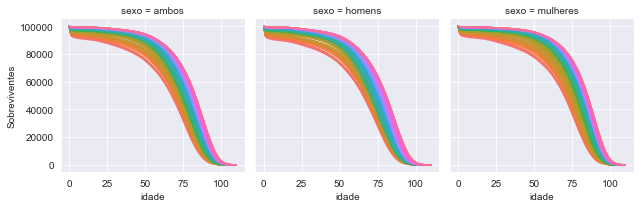

In [20]:
# grafico de sobreviventes - lx
sns.set_style("darkgrid")

# Amostra:
#df_agregado_amostra = df_agregado.query("Year == 1990")

graf = sns.FacetGrid(df_agregado, col="sexo", hue="Year")
graf.map(sns.lineplot, "Age", "lx")
#graf.add_legend()
graf.set_xlabels("idade")
graf.set_ylabels("Sobreviventes")

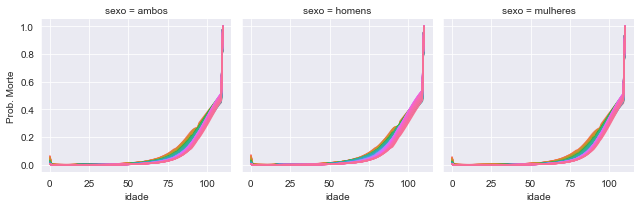

In [22]:
# grafico - probabilidade de morte
graf = sns.FacetGrid(df_agregado, col="sexo", hue="Year")
graf.map(sns.lineplot, "Age", "qx")
#graf.add_legend()
graf.set_xlabels("idade")
graf.set_ylabels("Prob. Morte")

<ipython-input-23-96003e944d19>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agregado_0.sort_values(by=['sexo', 'Year'], inplace=True)


[]

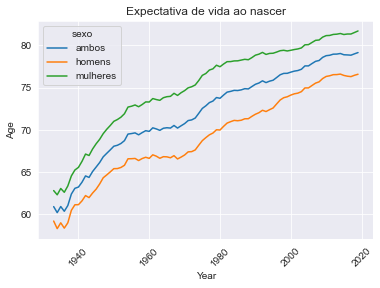

In [23]:
# Grafico de Expecativa de vida ao nascer
# Dataframe com x = 0
#sns.set() #reset o seaborn

df_agregado_0 = df_agregado.query("Age == 0")
df_agregado_0.sort_values(by=['sexo', 'Year'], inplace=True)
graf_0 = sns.lineplot(x='Year', y='ex', ci=None, data=df_agregado_0, hue="sexo")
graf_0.set_title("Expectativa de vida ao nascer")
graf_0.set_ylabel('Age')
plt.xticks(rotation=45)
graf_0.plot()
# =============== GRAFICOS FIM =====================